In [6]:
import numpy as np
import matplotlib.pyplot as plt

print('\nName:- Abhishikth Boda')
print('Roll Number:- S20210010044')
print('Course:- Machine Learning')
print('Section:- 2')
print('Assignment Number:- 8')
print('Date:- 12th October 2023\n')

print('Program is being executed\n')


Name:- Abhishikth Boda
Roll Number:- S20210010044
Course:- Machine Learning
Section:- 2
Assignment Number:- 8
Date:- 12th October 2023

Program is being executed



In [7]:
np.random.seed(42)

num_samples = 1000
training_set_sizes = np.arange(10, 101, 10)
num_simulations = 100

bias_values = []
variance_values = []

In [8]:
for training_size in training_set_sizes:
    bias_sum = 0
    variance_sum = 0

    for _ in range(num_simulations):
        class1_samples = np.random.multivariate_normal([0, 2], np.identity(2), size=num_samples // 2)
        class2_samples = np.random.multivariate_normal([0, 4], np.identity(2), size=num_samples // 2)

        data = np.vstack((class1_samples, class2_samples))
        labels = np.array([0] * (num_samples // 2) + [1] * (num_samples // 2))

        indices = np.random.choice(num_samples, size=training_size, replace=False)
        training_data = data[indices]
        training_labels = labels[indices]

        def one_nearest_neighbor(sample):
            distances = np.sum((training_data - sample) ** 2, axis=1)
            nearest_neighbor_idx = np.argmin(distances)
            return training_labels[nearest_neighbor_idx]

        predictions = np.array([one_nearest_neighbor(sample) for sample in data])

        bias = np.mean((predictions - labels) ** 2)
        variance = np.var(predictions)

        bias_sum += bias
        variance_sum += variance

    bias_avg = bias_sum / num_simulations
    variance_avg = variance_sum / num_simulations

    bias_values.append(bias_avg)
    variance_values.append(variance_avg)

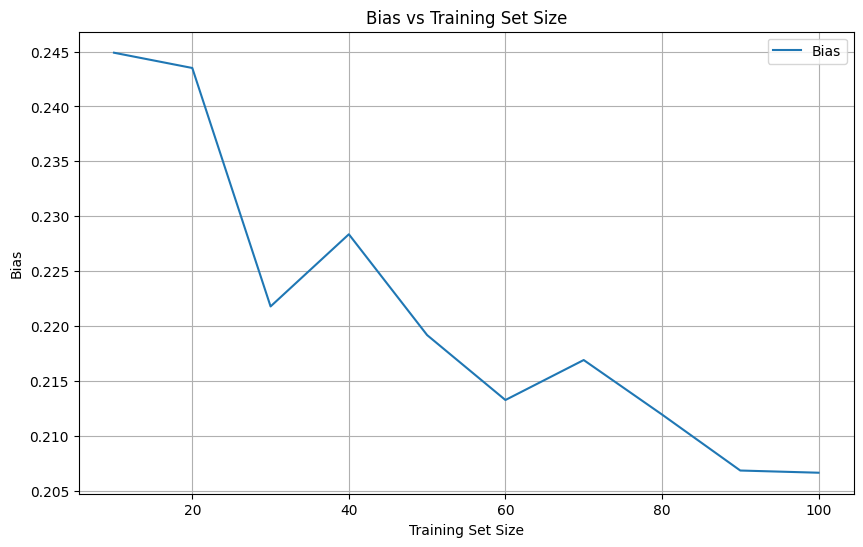

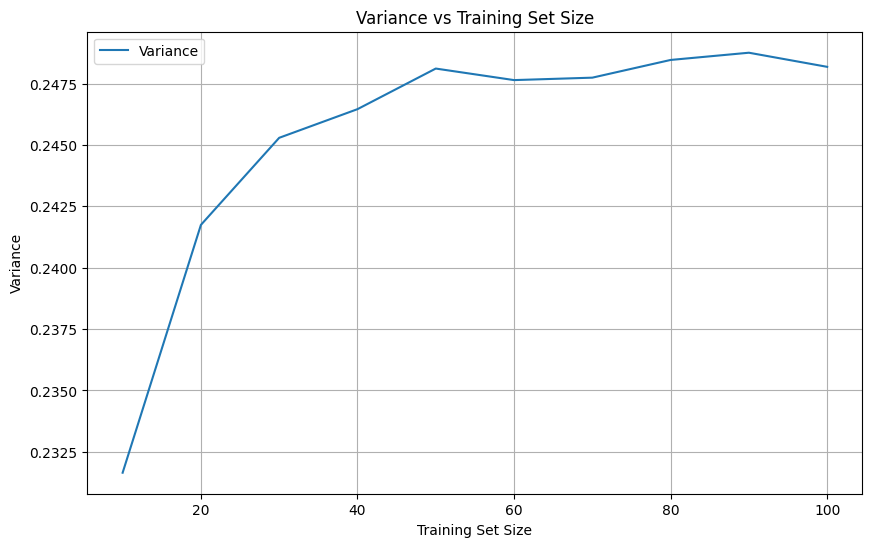

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, bias_values, label='Bias')
plt.xlabel('Training Set Size')
plt.ylabel('Bias')
plt.title('Bias vs Training Set Size')
plt.legend()
plt.grid()

plt.figure(figsize=(10, 6))
plt.plot(training_set_sizes, variance_values, label='Variance')
plt.xlabel('Training Set Size')
plt.ylabel('Variance')
plt.title('Variance vs Training Set Size')
plt.legend()
plt.grid()

plt.show()